In [3]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [4]:
from model_comparer import ModelComparer
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')
from plotting_utils import fig_saver
import gas_phase_data
import numpy as np
import apogee_analysis as aah

/users/PAS2232/aeyobd/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [155]:
import sys
sys.path.append("../")
import surp
import multizone_sim
from vice_to_pickle import vice_model
from plotting_utils import fig_saver, fancy_legend

In [182]:
sf = fig_saver("figures")

In [153]:
f_agb = 0.4
beta = 0.4

study = "karakas16"


In [178]:
def calc_f_agb(study="cristallo11"):
    model = vice_model.from_file("pickles/%s_f%s_Z%s_eta1_v1.pickle" % (study, f_agb, beta))
    h = model.history[model.history.R == 7.8]
    
    y_c = 0.00724
    if model == "cristallo11":
        y_agb = 4.04e-4 #cristallo11
    elif model == "karakas10":
        y_agb = 6.43e-4
    elif model == "ventura13":
        y_agb = 2.14e-4
    elif model == "karakas16":
        y_agb = 4.04e-4

    alpha_cc = (1-f_agb) * y_c

    def y_c_cc(Z):
        #k16 2
        return alpha_cc * (Z/0.014)**beta

    y_o_cc = 0.015
    
    sfr = np.array(h["sfr"][:-1]) # solar mass per year
    z_o = np.array(h["z(o)"][1:]) # mass fraction
    z_c = np.array(h["z(c)"][1:]) # mass fraction
    z = 0.014*10**np.array(h["[m/h]"][:-1]) # metallicity mass fraction
    eta = np.array(h["eta_0"][1:]) # mass loading factor 
    r = np.array(h["r_eff"][1:]) # recycling parameter
    t = np.array(h["time"])[:-1] # Gyr

    dt = (t[1] - t[0])*1e9 # years
    m_dot_o = (np.array(h["mass(o)"][1:]) - np.array(h["mass(o)"][:-1]))/dt # solar mass per year
    m_dot_c = (h["mass(c)"][1:] - np.array(h["mass(c)"][:-1]))/dt # solar mass per year

    m_dot_o_pred = sfr*( y_o_cc - z_o*(1 + eta - r)) 

    m_dot_c_out = - sfr * z_c*(1 + eta - r)
    m_dot_c_cc = sfr*y_c_cc(z)
    m_dot_c_agb = m_dot_c - m_dot_c_cc - m_dot_c_out
    m_dot_c_total = m_dot_c_cc + m_dot_c_agb
     
    print(z_o[-1])
    
    w = 100
    def moving_average(x):
        return np.convolve(x, np.ones(w), "valid")/w

    t2 = t[:-w+1]
    m_dot_c_cc2 = moving_average(m_dot_c_cc)
    m_dot_c_agb2 = moving_average(m_dot_c_agb)
    m_dot_c_total2 = moving_average(m_dot_c_total)
    
    return t2, m_dot_c_cc2, m_dot_c_agb2, m_dot_c_total

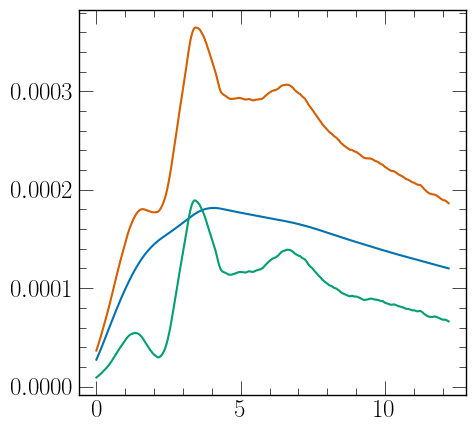

In [179]:
plt.plot(t, cc)
plt.plot(t, agb)
plt.plot(t, total)

0.005568053096902419
0.005585021674660217
0.005092348083822821
0.00570108836643552


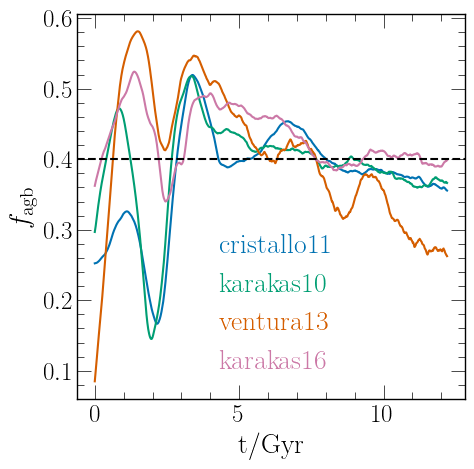

In [183]:
for study in ["cristallo11", "karakas10", "ventura13", "karakas16"]:
    t, cc, agb, _ = calc_f_agb(study)
    total = cc+agb
    plt.plot(t, agb/total, label=study)
    plt.ylabel(r"$f_\text{agb}$")
plt.axhline(f_agb, color="k", ls="--")
fancy_legend()
plt.xlabel("t/Gyr")

sf("f_agb_verification")

In [ ]:
for study in ["cristallo11", "karakas10", "ventura13", "karakas16"]:
    t, cc, agb, _ = calc_f_agb(study)
    total = cc+agb
    plt.plot(t, agb/total, label=study)
    plt.ylabel(r"$f_\text{agb}$")
plt.axhline(f_agb, color="k", ls="--")
fancy_legend()
plt.xlabel("t/Gyr")